In this notebook I will perform some EDA on the "Where it pays to Attend College?" dataset, and try to identfiy as many patterns as .

Since this is one of my first truly independent dataset analyses, some rookies mistakes are to be expected.

I will start by uploading a few of the more popular libraries, but will likely come back to update that list.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

%matplotlib inline

from typing import List, Union

Define a function that will clean the numerical data from symbols that will make defining the type difficult.

In [2]:
def replacer(string):
    
    """Replaces the characters ['%', '$', ',', '.'] with an empty space so that the object type columns get converter to floats
    
    Input Args: a string with one of the abovementioned characters
    Returns: a string ready to be converted to a float
    """
    
    for ch in ['%', '$', ',', '.']:
        string = string.map(lambda x: x.replace(ch, ''))
    return string

## Import the data

The data is storred in 3 seperate csv files.

In [3]:
# files inside data folder 
%ls /Users/LyubomirKushev/Desktop/Data\ Science/Kaggle/Where\ it\ pays\ to\ go\ to\ college/1189_2137_bundle_archive/

degrees-that-pay-back.csv     salaries-by-region.csv
salaries-by-college-type.csv


In [4]:
%cd /Users/LyubomirKushev/Desktop/Data\ Science/Kaggle/Where\ it\ pays\ to\ go\ to\ college/1189_2137_bundle_archive/

/Users/LyubomirKushev/Desktop/Data Science/Kaggle/Where it pays to go to college/1189_2137_bundle_archive


### Degrees that pay back

In [5]:
DEGREES = pd.read_csv("degrees-that-pay-back.csv")

In [6]:
DEGREES.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


In [7]:
DEGREES.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
Undergraduate Major                                  50 non-null object
Starting Median Salary                               50 non-null object
Mid-Career Median Salary                             50 non-null object
Percent change from Starting to Mid-Career Salary    50 non-null float64
Mid-Career 10th Percentile Salary                    50 non-null object
Mid-Career 25th Percentile Salary                    50 non-null object
Mid-Career 75th Percentile Salary                    50 non-null object
Mid-Career 90th Percentile Salary                    50 non-null object
dtypes: float64(1), object(7)
memory usage: 3.2+ KB


In [8]:
cols = ['Starting Median Salary','Mid-Career Median Salary', 'Mid-Career 10th Percentile Salary', 'Mid-Career 25th Percentile Salary', 'Mid-Career 75th Percentile Salary', 'Mid-Career 90th Percentile Salary']

In [9]:
DEGREES[cols] = DEGREES[cols].apply(replacer) # apply the replaced
DEGREES[cols] = DEGREES[cols].astype('float64') # convert to float
DEGREES[cols] = DEGREES[cols]/100 # because the '.' is removed from the string

In [10]:
DEGREES.describe()

,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
count,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,44310.000000,74786.00000,69.274000,43408.000000,55988.000000,102138.000000,142766.000000
std,9360.866217,16088.40386,17.909908,12000.779567,13936.951911,20636.789914,27851.249267
min,34000.000000,52000.00000,23.400000,26700.000000,36500.000000,70500.000000,96400.000000
25%,37050.000000,60825.00000,59.125000,34825.000000,44975.000000,83275.000000,124250.000000
50%,40850.000000,72000.00000,67.800000,39400.000000,52450.000000,99400.000000,145500.000000
75%,49875.000000,88750.00000,82.425000,49850.000000,63700.000000,118750.000000,161750.000000
max,74300.000000,107000.00000,103.500000,71900.000000,87300.000000,145000.000000,210000.000000


In [11]:
DEGREES['Undergraduate Major'].describe()

count           50
unique          50
top       Religion
freq             1
Name: Undergraduate Major, dtype: object

### Salaries by college type

In [12]:
TYPE = pd.read_csv("salaries-by-college-type.csv")

In [13]:
TYPE.head(15)

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00"
1,California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,Engineering,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00"
4,Cooper Union,Engineering,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN
5,Worcester Polytechnic Institute (WPI),Engineering,"$61,000.00","$114,000.00","$80,000.00","$91,200.00","$137,000.00","$180,000.00"
6,Carnegie Mellon University (CMU),Engineering,"$61,800.00","$111,000.00","$63,300.00","$80,100.00","$150,000.00","$209,000.00"
7,Rensselaer Polytechnic Institute (RPI),Engineering,"$61,100.00","$110,000.00","$71,600.00","$85,500.00","$140,000.00","$182,000.00"
8,Georgia Institute of Technology,Engineering,"$58,300.00","$106,000.00","$67,200.00","$85,200.00","$137,000.00","$183,000.00"
9,Colorado School of Mines,Engineering,"$58,100.00","$106,000.00","$62,200.00","$87,900.00","$142,000.00","$201,000.00"


In [14]:
salary_cols = ['Starting Median Salary','Mid-Career Median Salary', 'Mid-Career 10th Percentile Salary', 'Mid-Career 25th Percentile Salary', 'Mid-Career 75th Percentile Salary', 'Mid-Career 90th Percentile Salary']

In [15]:
TYPE[salary_cols] = TYPE[salary_cols].fillna('0')
TYPE[salary_cols] = TYPE[salary_cols].apply(replacer)
TYPE[salary_cols] = TYPE[salary_cols].astype('float64')
TYPE[salary_cols] = TYPE[salary_cols]/100
TYPE['Percent change from start to mid per college type'] = ((TYPE['Mid-Career Median Salary'] - TYPE['Starting Median Salary'])/TYPE['Starting Median Salary'])*100
TYPE.head()

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,Percent change from start to mid per college type
0,Massachusetts Institute of Technology (MIT),Engineering,72200.0,126000.0,76800.0,99200.0,168000.0,220000.0,74.515235
1,California Institute of Technology (CIT),Engineering,75500.0,123000.0,0.0,104000.0,161000.0,0.0,62.913907
2,Harvey Mudd College,Engineering,71800.0,122000.0,0.0,96000.0,180000.0,0.0,69.916435
3,"Polytechnic University of New York, Brooklyn",Engineering,62400.0,114000.0,66800.0,94300.0,143000.0,190000.0,82.692308
4,Cooper Union,Engineering,62200.0,114000.0,0.0,80200.0,142000.0,0.0,83.279743


In [16]:
TYPE.describe()

,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,Percent change from start to mid per college type
count,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000
mean,46068.401487,83932.342007,37999.628253,60373.234201,116275.092937,135427.509294,81.830374
std,6412.616242,14336.191107,17426.240075,11381.348857,22952.334054,63789.092095,14.563322
min,34800.000000,43900.000000,0.000000,31800.000000,60900.000000,0.000000,24.362606
25%,42000.000000,74000.000000,36600.000000,53200.000000,100000.000000,126000.000000,73.160173
50%,44700.000000,81600.000000,41600.000000,58400.000000,113000.000000,148000.000000,81.663516
75%,48300.000000,92200.000000,46400.000000,65100.000000,126000.000000,165000.000000,89.270386
max,75500.000000,134000.000000,80000.000000,104000.000000,234000.000000,326000.000000,131.034483


In [17]:
TYPE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 9 columns):
School Name                                          269 non-null object
School Type                                          269 non-null object
Starting Median Salary                               269 non-null float64
Mid-Career Median Salary                             269 non-null float64
Mid-Career 10th Percentile Salary                    269 non-null float64
Mid-Career 25th Percentile Salary                    269 non-null float64
Mid-Career 75th Percentile Salary                    269 non-null float64
Mid-Career 90th Percentile Salary                    269 non-null float64
Percent change from start to mid per college type    269 non-null float64
dtypes: float64(7), object(2)
memory usage: 19.0+ KB


### Salaries by Region

In [18]:
REGION = pd.read_csv("salaries-by-region.csv")

In [19]:
REGION.head(15)

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,"$70,400.00","$129,000.00","$68,400.00","$93,100.00","$184,000.00","$257,000.00"
1,California Institute of Technology (CIT),California,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,California,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"University of California, Berkeley",California,"$59,900.00","$112,000.00","$59,500.00","$81,000.00","$149,000.00","$201,000.00"
4,Occidental College,California,"$51,900.00","$105,000.00",NaN,"$54,800.00","$157,000.00",NaN
5,Cal Poly San Luis Obispo,California,"$57,200.00","$101,000.00","$55,000.00","$74,700.00","$133,000.00","$178,000.00"
6,University of California at Los Angeles (UCLA),California,"$52,600.00","$101,000.00","$51,300.00","$72,500.00","$139,000.00","$193,000.00"
7,"University of California, San Diego (UCSD)",California,"$51,100.00","$101,000.00","$51,700.00","$75,400.00","$131,000.00","$177,000.00"
8,Pomona College,California,"$48,600.00","$101,000.00",NaN,"$63,300.00","$161,000.00",NaN
9,University of Southern California (USC),California,"$54,800.00","$99,600.00","$49,700.00","$73,800.00","$140,000.00","$201,000.00"


In [20]:
REGION.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 8 columns):
School Name                          320 non-null object
Region                               320 non-null object
Starting Median Salary               320 non-null object
Mid-Career Median Salary             320 non-null object
Mid-Career 10th Percentile Salary    273 non-null object
Mid-Career 25th Percentile Salary    320 non-null object
Mid-Career 75th Percentile Salary    320 non-null object
Mid-Career 90th Percentile Salary    273 non-null object
dtypes: object(8)
memory usage: 20.1+ KB


In [21]:
region_cols = ['Starting Median Salary','Mid-Career Median Salary','Mid-Career 10th Percentile Salary','Mid-Career 25th Percentile Salary','Mid-Career 75th Percentile Salary','Mid-Career 90th Percentile Salary']

In [22]:
REGION[region_cols] = REGION[region_cols].fillna('0')
REGION[region_cols] = REGION[region_cols].apply(replacer)
REGION[region_cols] = REGION[region_cols].astype('float64')
REGION[region_cols] = REGION[region_cols]/100
REGION['Percent change from start to mid per region'] = ((REGION['Mid-Career Median Salary'] - REGION['Starting Median Salary'])/REGION['Starting Median Salary'])*100
REGION.head()

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,Percent change from start to mid per region
0,Stanford University,California,70400.0,129000.0,68400.0,93100.0,184000.0,257000.0,83.238636
1,California Institute of Technology (CIT),California,75500.0,123000.0,0.0,104000.0,161000.0,0.0,62.913907
2,Harvey Mudd College,California,71800.0,122000.0,0.0,96000.0,180000.0,0.0,69.916435
3,"University of California, Berkeley",California,59900.0,112000.0,59500.0,81000.0,149000.0,201000.0,86.978297
4,Occidental College,California,51900.0,105000.0,0.0,54800.0,157000.0,0.0,102.312139


In [23]:
REGION.describe()

,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,Percent change from start to mid per region
count,320.000000,320.000000,320.000000,320.000000,320.000000,320.00000,320.000000
mean,46253.437500,83934.375000,38606.562500,60614.062500,116496.875000,136877.18750,80.989461
std,6617.038001,15191.443091,17886.421201,11786.436432,24104.265214,66252.79703,16.216647
min,34500.000000,43900.000000,0.000000,31800.000000,60900.000000,0.00000,17.380353
25%,42000.000000,73725.000000,37200.000000,53100.000000,99825.000000,125750.00000,71.842122
50%,45100.000000,82700.000000,42450.000000,59400.000000,113000.000000,149000.00000,81.181138
75%,48900.000000,93250.000000,47925.000000,66025.000000,129000.000000,171000.00000,90.116476
max,75500.000000,134000.000000,80000.000000,104000.000000,234000.000000,326000.00000,131.034483


### Analysis

In [24]:
start_v_mid_type = TYPE.groupby(['School Type'])[['Starting Median Salary', 'Mid-Career Median Salary']].mean()
start_v_mid_type['Percent change from start to mid per college type'] = ((start_v_mid_type['Mid-Career Median Salary'] - start_v_mid_type['Starting Median Salary'])/start_v_mid_type['Starting Median Salary'])*100
start_v_mid_type

,Starting Median Salary,Mid-Career Median Salary,Percent change from start to mid per college type
School Type,,,
Engineering,59057.894737,103842.105263,75.831031
Ivy League,60475.000000,120125.000000,98.635800
Liberal Arts,45746.808511,89378.723404,95.376959
Party,45715.000000,84685.000000,85.245543
State,44126.285714,78567.428571,78.051307


In [25]:
start_v_mid_region = REGION.groupby(['Region'])[['Starting Median Salary', 'Mid-Career Median Salary']].mean()
start_v_mid_region['Percent change from start to mid per college type'] = ((start_v_mid_region['Mid-Career Median Salary'] - start_v_mid_region['Starting Median Salary'])/start_v_mid_region['Starting Median Salary'])*100
start_v_mid_region.head()

,Starting Median Salary,Mid-Career Median Salary,Percent change from start to mid per college type
Region,,,
California,51032.142857,93132.142857,82.497026
Midwestern,44225.352113,78180.281690,76.777070
Northeastern,48496.000000,91352.000000,88.370175
Southern,44521.518987,79505.063291,78.576709
Western,44414.285714,78200.000000,76.069476


In [29]:
display(DEGREES.head())
display(TYPE.head())
display(REGION.head())

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,46000.0,77100.0,67.6,42200.0,56100.0,108000.0,152000.0
1,Aerospace Engineering,57700.0,101000.0,75.0,64300.0,82100.0,127000.0,161000.0
2,Agriculture,42600.0,71900.0,68.8,36300.0,52100.0,96300.0,150000.0
3,Anthropology,36800.0,61500.0,67.1,33800.0,45500.0,89300.0,138000.0
4,Architecture,41600.0,76800.0,84.6,50600.0,62200.0,97000.0,136000.0


,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,Percent change from start to mid per college type
0,Massachusetts Institute of Technology (MIT),Engineering,72200.0,126000.0,76800.0,99200.0,168000.0,220000.0,74.515235
1,California Institute of Technology (CIT),Engineering,75500.0,123000.0,0.0,104000.0,161000.0,0.0,62.913907
2,Harvey Mudd College,Engineering,71800.0,122000.0,0.0,96000.0,180000.0,0.0,69.916435
3,"Polytechnic University of New York, Brooklyn",Engineering,62400.0,114000.0,66800.0,94300.0,143000.0,190000.0,82.692308
4,Cooper Union,Engineering,62200.0,114000.0,0.0,80200.0,142000.0,0.0,83.279743


,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,Percent change from start to mid per region
0,Stanford University,California,70400.0,129000.0,68400.0,93100.0,184000.0,257000.0,83.238636
1,California Institute of Technology (CIT),California,75500.0,123000.0,0.0,104000.0,161000.0,0.0,62.913907
2,Harvey Mudd College,California,71800.0,122000.0,0.0,96000.0,180000.0,0.0,69.916435
3,"University of California, Berkeley",California,59900.0,112000.0,59500.0,81000.0,149000.0,201000.0,86.978297
4,Occidental College,California,51900.0,105000.0,0.0,54800.0,157000.0,0.0,102.312139


In [44]:
perc_change = DEGREES[['Undergraduate Major', 'Percent change from Starting to Mid-Career Salary']]
perc_change.sort_values('Percent change from Starting to Mid-Career Salary', ascending=False)

,Undergraduate Major,Percent change from Starting to Mid-Career Salary
37,Math,103.5
42,Philosophy,103.5
33,International Relations,97.8
17,Economics,96.8
36,Marketing,95.1
44,Physics,93.4
45,Political Science,91.7
9,Chemistry,87.6
34,Journalism,87.4
4,Architecture,84.6


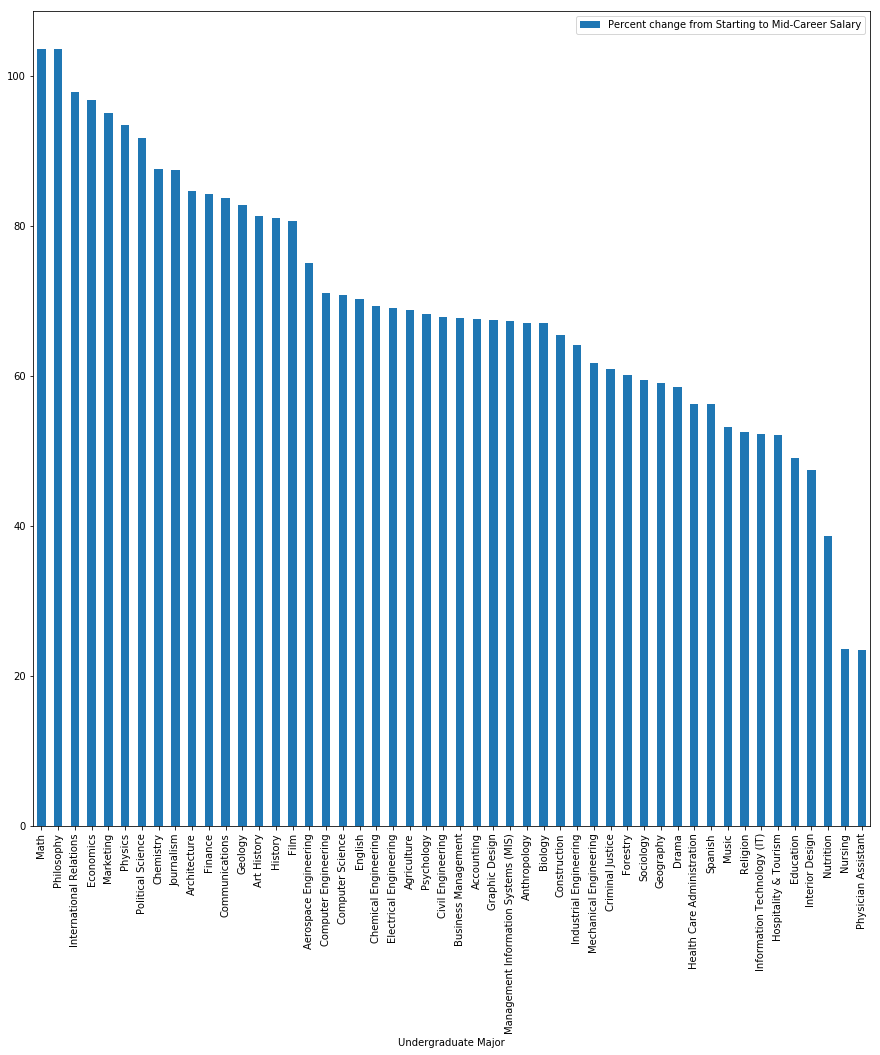

In [53]:
perc_change.sort_values('Percent change from Starting to Mid-Career Salary', ascending=False).plot(kind='bar', x='Undergraduate Major', y='Percent change from Starting to Mid-Career Salary', figsize=(15,15))

In [95]:
perc_series = perc_change['Percent change from Starting to Mid-Career Salary']
perc_change

,Undergraduate Major,Percent change from Starting to Mid-Career Salary
0,Accounting,67.6
1,Aerospace Engineering,75.0
2,Agriculture,68.8
3,Anthropology,67.1
4,Architecture,84.6
5,Art History,81.3
6,Biology,67.0
7,Business Management,67.7
8,Chemical Engineering,69.3
9,Chemistry,87.6


In [62]:
def bin_perc(series: pd.Series) -> pd.Series:
    percent_labels = [f"[{i}, {i+10})" for i in range(0,110,10)]
    
    percent_bins = pd.IntervalIndex.from_tuples(
        [(i, i+10) for i in range(0,10,10)],
        closed="left"
    )
    
    percent_binned = pd.cut(
        series,
        percent_bins,
        labels = percent_labels,
        precision=2,
        include_lowest=True
    )
    
    percent_binned.sort_values(ascending=True, inplace=True)
    
    percent_binned = percent_binned.astype('str')
    
    return percent_binned

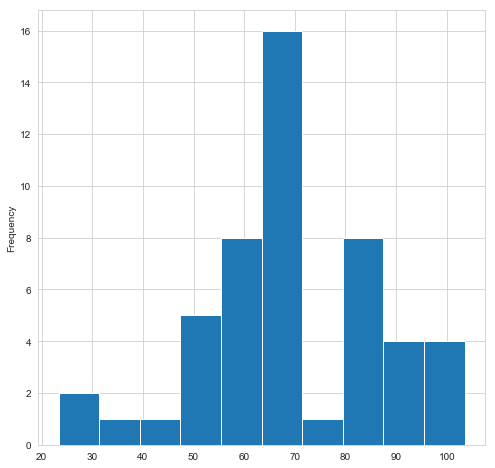

In [102]:
sns.set_style('whitegrid')

DEGREES['Percent change from Starting to Mid-Career Salary'].plot(kind='hist', bins=10, figsize=(8,8))

In [158]:
DEGREES['quantile_ex_1'] = pd.cut(DEGREES['Percent change from Starting to Mid-Career Salary'],bins=10)
DEGREES = DEGREES.drop(columns=['quantile_ex_2'])

In [159]:
DEGREES.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,quantile_ex_1
0,Accounting,46000.0,77100.0,67.6,42200.0,56100.0,108000.0,152000.0,"(63.45, 71.46]"
1,Aerospace Engineering,57700.0,101000.0,75.0,64300.0,82100.0,127000.0,161000.0,"(71.46, 79.47]"
2,Agriculture,42600.0,71900.0,68.8,36300.0,52100.0,96300.0,150000.0,"(63.45, 71.46]"
3,Anthropology,36800.0,61500.0,67.1,33800.0,45500.0,89300.0,138000.0,"(63.45, 71.46]"
4,Architecture,41600.0,76800.0,84.6,50600.0,62200.0,97000.0,136000.0,"(79.47, 87.48]"


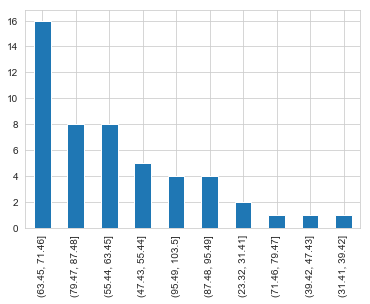

In [152]:
DEGREES['quantile_ex_1'].value_counts().plot(kind='bar')